# Melanoma Skin Cancer Detection

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from melanoma_detection.models import MelanomaNetwork, ResNet
from melanoma_detection.utils.metrics_utils import plot_metrics, compute_metrics
from melanoma_detection.preprocess_dataset import create_test_dataset, create_train_dataset, MelanomaDataset
from melanoma_detection.transforms import AdjustSharpness, MelanomaMaskTransform
from melanoma_detection.utils.img_utils import plot_image
from melanoma_detection.models.base import StoppingCriteria
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [6]:
# Constants
BATCH_SIZE = 32
EPOCHS = 20

# Imagenet normalization values
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

In [3]:
# Transforms to be applied to data loaders
transform_train = transforms.Compose(
    [
        MelanomaMaskTransform(),
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(20),
        AdjustSharpness(3),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD),
    ]
)

transform_validation = transforms.Compose(
    [
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        MelanomaMaskTransform(),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD),
    ]
)

In [7]:
train_loader = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform_train),
    BATCH_SIZE,
    shuffle=True,
    num_workers=10,
)

test_loader = DataLoader(
    MelanomaDataset(create_test_dataset(), transform=transform_validation),
    BATCH_SIZE,
    shuffle=False,
    num_workers=10,
)

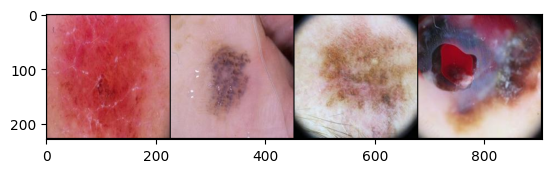

0.0 0.0 1.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


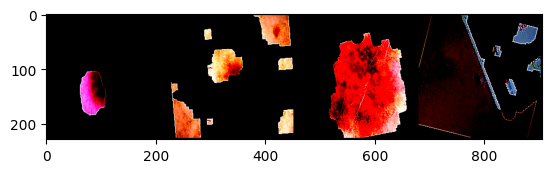

0.0 0.0 1.0 1.0


In [5]:
sample_data = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
            transforms.ToTensor(),
        ])),
    4,
    shuffle=True,
    num_workers=10,
)

sample_data_w_tf = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform_train),
    4,
    shuffle=True,
    num_workers=10,
)


# get some random training images
dataiter = iter(sample_data)
images, labels = dataiter.__next__()

plot_image(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(4)))

dataiter = iter(sample_data_w_tf)
images, labels = dataiter.__next__()

plot_image(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(4)))

In [8]:
net = MelanomaNetwork()

criterion = torch.nn.BCEWithLogitsLoss()

optimizer = optim.Adam(
    net.parameters(),
    # lr=6.051040788116986e-05,
    # betas=(0.8362066397681903, 0.9907655800812818),
    # weight_decay=3.6250408963045035e-10,
    lr=0.0002288372831567034,
    betas=(0.8378331684737104, 0.9034144582679383),
    weight_decay=3.358130934902445e-09,
)

net.fit(
    train_loader,
    test_loader,
    EPOCHS,
    optimizer,
    criterion,
    StoppingCriteria(3),
    True,
)

PATH = "./best_model"
net.save(PATH)

Validation: 100%|██████████| 63/63 [00:01<00:00, 37.68it/s]


Validation Loss: 0.944712, Accuracy: 68.40%
Epoch [1/20] - Train Loss: 0.695547, Train Accuracy: 76.30%, Val Loss: 0.944712, Val Accuracy: 68.40%, Val Metrics: {'accuracy': 0.684, 'precision': 0.7371134020618557, 'recall': 0.572, 'f1_score': 0.6441441441441441, 'auc': 0.684}


Validation: 100%|██████████| 63/63 [00:01<00:00, 38.15it/s]


Validation Loss: 0.832665, Accuracy: 68.20%
Epoch [2/20] - Train Loss: 0.532319, Train Accuracy: 81.29%, Val Loss: 0.832665, Val Accuracy: 68.20%, Val Metrics: {'accuracy': 0.682, 'precision': 0.8084745762711865, 'recall': 0.477, 'f1_score': 0.6, 'auc': 0.6819999999999999}


Validation: 100%|██████████| 63/63 [00:01<00:00, 37.82it/s]


Validation Loss: 0.712063, Accuracy: 72.70%
Epoch [3/20] - Train Loss: 0.476029, Train Accuracy: 82.89%, Val Loss: 0.712063, Val Accuracy: 72.70%, Val Metrics: {'accuracy': 0.727, 'precision': 0.8673139158576052, 'recall': 0.536, 'f1_score': 0.6625463535228677, 'auc': 0.7270000000000001}


Validation: 100%|██████████| 63/63 [00:01<00:00, 37.57it/s]


Validation Loss: 0.853904, Accuracy: 68.40%
Epoch [4/20] - Train Loss: 0.453110, Train Accuracy: 83.63%, Val Loss: 0.853904, Val Accuracy: 68.40%, Val Metrics: {'accuracy': 0.684, 'precision': 0.896551724137931, 'recall': 0.416, 'f1_score': 0.5683060109289617, 'auc': 0.6839999999999999}


Validation: 100%|██████████| 63/63 [00:01<00:00, 37.64it/s]


Validation Loss: 0.947800, Accuracy: 68.20%
Epoch [5/20] - Train Loss: 0.438672, Train Accuracy: 84.19%, Val Loss: 0.947800, Val Accuracy: 68.20%, Val Metrics: {'accuracy': 0.682, 'precision': 0.8540856031128404, 'recall': 0.439, 'f1_score': 0.5799207397622193, 'auc': 0.682}


Validation: 100%|██████████| 63/63 [00:01<00:00, 37.83it/s]


Validation Loss: 0.593885, Accuracy: 75.55%
Epoch [6/20] - Train Loss: 0.422354, Train Accuracy: 84.49%, Val Loss: 0.593885, Val Accuracy: 75.55%, Val Metrics: {'accuracy': 0.7555, 'precision': 0.7988304093567251, 'recall': 0.683, 'f1_score': 0.736388140161725, 'auc': 0.7555000000000001}


Validation: 100%|██████████| 63/63 [00:01<00:00, 37.84it/s]


Validation Loss: 0.726941, Accuracy: 74.10%
Epoch [7/20] - Train Loss: 0.416182, Train Accuracy: 84.66%, Val Loss: 0.726941, Val Accuracy: 74.10%, Val Metrics: {'accuracy': 0.741, 'precision': 0.8356545961002786, 'recall': 0.6, 'f1_score': 0.6984866123399301, 'auc': 0.741}


Validation: 100%|██████████| 63/63 [00:01<00:00, 38.06it/s]


Validation Loss: 0.847060, Accuracy: 72.45%
Epoch [8/20] - Train Loss: 0.407885, Train Accuracy: 85.02%, Val Loss: 0.847060, Val Accuracy: 72.45%, Val Metrics: {'accuracy': 0.7245, 'precision': 0.8480620155038759, 'recall': 0.547, 'f1_score': 0.6650455927051672, 'auc': 0.7245000000000001}


Validation: 100%|██████████| 63/63 [00:01<00:00, 37.72it/s]


Validation Loss: 0.576522, Accuracy: 76.00%
Epoch [9/20] - Train Loss: 0.401557, Train Accuracy: 85.44%, Val Loss: 0.576522, Val Accuracy: 76.00%, Val Metrics: {'accuracy': 0.76, 'precision': 0.8494623655913979, 'recall': 0.632, 'f1_score': 0.7247706422018348, 'auc': 0.76}


Loss: 0.410733:  23%|██▎       | 85/372 [00:07<00:23, 12.28it/s]

In [15]:
net = MelanomaNetwork()

criterion = torch.nn.BCEWithLogitsLoss()
net.load("best_model")
net.validate(test_loader, criterion)

net.load("best_model_custom.pth")
net.validate(test_loader, criterion)

net = ResNet()
net.load("best_model_resnet.pth")
net.validate(test_loader, criterion)

Validation: 100%|██████████| 40/40 [00:01<00:00, 23.12it/s]


Validation Loss: 0.329295, Accuracy: 87.75%


Validation: 100%|██████████| 40/40 [00:01<00:00, 23.30it/s]


Validation Loss: 0.240557, Accuracy: 91.05%


Validation: 100%|██████████| 40/40 [00:04<00:00,  8.17it/s]

Validation Loss: 0.209470, Accuracy: 92.20%


(0.2094703119248152,
 92.2,
 {'accuracy': 0.922,
  'precision': 0.9113060428849903,
  'recall': 0.935,
  'f1_score': 0.9230009871668312,
  'auc': 0.922})